In [3]:
import pandas as pd
from sklearn.cluster import KMeans

cric_df = pd.read_csv('Cricket.csv', encoding='palmos')
cric_df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [6]:
cric_df_1 = cric_df[['SR','Ave']]

In [7]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
cric_df_2 = std_scaler.fit_transform(cric_df_1)

In [11]:
model_clus = KMeans(n_clusters = 4, max_iter=50, random_state=100)
model_clus.fit(cric_df_2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [13]:
cluster_df = pd.DataFrame(pd.Series(model_clus.labels_), columns=['cluster'])

In [14]:
cric_df_c = pd.concat([cric_df['Player'],cric_df_1,cluster_df], axis=1)

In [15]:
cric_df_c.head()

,Player,SR,Ave,cluster
0,SR Tendulkar (INDIA),86.23,44.83,3
1,KC Sangakkara (Asia/ICC/SL),78.86,41.98,1
2,RT Ponting (AUS/ICC),80.39,42.03,1
3,ST Jayasuriya (Asia/SL),91.20,32.36,0
4,DPMD Jayawardene (Asia/SL),78.96,33.37,2


In [16]:
cric_df_c

,Player,SR,Ave,cluster
0,SR Tendulkar (INDIA),86.23,44.83,3
1,KC Sangakkara (Asia/ICC/SL),78.86,41.98,1
2,RT Ponting (AUS/ICC),80.39,42.03,1
3,ST Jayasuriya (Asia/SL),91.20,32.36,0
4,DPMD Jayawardene (Asia/SL),78.96,33.37,2
5,Inzamam-ul-Haq (Asia/PAK),74.24,39.52,1
6,JH Kallis (Afr/ICC/SA),72.89,44.36,1
7,SC Ganguly (Asia/INDIA),73.70,41.02,1
8,R Dravid (Asia/ICC/INDIA),71.24,39.16,1
9,BC Lara (ICC/WI),79.51,40.48,1


In [17]:
cric_df_c[cric_df_c.cluster==3]

,Player,SR,Ave,cluster
0,SR Tendulkar (INDIA),86.23,44.83,3
13,MS Dhoni (Asia/INDIA),88.69,51.32,3
15,AB de Villiers (Afr/SA),100.25,53.55,3
25,V Kohli (INDIA),90.99,53.94,3
34,HM Amla (SA),89.05,50.25,3
38,MG Bevan (AUS),74.16,53.58,3
42,IVA Richards (WI),90.20,47.00,3
63,MJ Guptill (NZ),87.73,43.30,3
64,MEK Hussey (AUS),87.16,48.15,3


In [21]:
cluster_avg = pd.DataFrame(cric_df_c.groupby(["cluster"]).Ave.mean())
cluster_sr = pd.DataFrame(cric_df_c.groupby(["cluster"]).SR.mean())
df = pd.concat([pd.Series([0,1,2,3]), cluster_avg, cluster_sr], axis=1)
df.columns = ["ClusterID", "Avg", "SR"]
df.head()

,ClusterID,Avg,SR
0,0,35.409167,94.175833
1,1,41.484444,75.751852
2,2,33.949355,74.014839
3,3,49.546667,88.273333


In [40]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import matplotlib.pyplot as plt

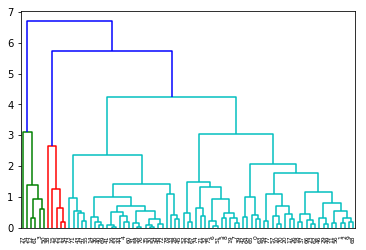

In [27]:
mergings = linkage(cric_df_2, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.figure(figsize=(16,8))
plt.show()

In [35]:
clusterCut = pd.DataFrame(pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,)), columns=['ClusterID'])
cdf = pd.concat([cric_df_1, clusterCut, cric_df['Player']], axis=1)

In [36]:
cdf.head()

,SR,Ave,ClusterID,Player
0,86.23,44.83,0,SR Tendulkar (INDIA)
1,78.86,41.98,0,KC Sangakkara (Asia/ICC/SL)
2,80.39,42.03,0,RT Ponting (AUS/ICC)
3,91.20,32.36,1,ST Jayasuriya (Asia/SL)
4,78.96,33.37,2,DPMD Jayawardene (Asia/SL)


In [37]:
cdf

,SR,Ave,ClusterID,Player
0,86.23,44.83,0,SR Tendulkar (INDIA)
1,78.86,41.98,0,KC Sangakkara (Asia/ICC/SL)
2,80.39,42.03,0,RT Ponting (AUS/ICC)
3,91.20,32.36,1,ST Jayasuriya (Asia/SL)
4,78.96,33.37,2,DPMD Jayawardene (Asia/SL)
5,74.24,39.52,0,Inzamam-ul-Haq (Asia/PAK)
6,72.89,44.36,0,JH Kallis (Afr/ICC/SA)
7,73.70,41.02,0,SC Ganguly (Asia/INDIA)
8,71.24,39.16,0,R Dravid (Asia/ICC/INDIA)
9,79.51,40.48,0,BC Lara (ICC/WI)


In [39]:
cluster_avg = pd.DataFrame(cdf.groupby(["ClusterID"]).Ave.mean())
cluster_sr = pd.DataFrame(cdf.groupby(["ClusterID"]).SR.mean())
df = pd.concat([pd.Series([0,1,2,3]), cluster_avg, cluster_sr], axis=1)
df.columns = ["ClusterID", "Avg", "SR"]
df.head()

,ClusterID,Avg,SR
0,0,41.066829,78.366829
1,1,32.123333,99.933333
2,2,33.489630,74.390741
3,3,52.528000,88.628000
